# PRCP-1027-Skin Disorder

# Table of Contents
1.Project Background   2.Bussiness case   3.Domain Analysis   4.Exploratory Data Analysis   5.Data Preprocessing    6. Model Creation    7. Methodology   8.Observations   9.Conclusion   10.Suggestions for Early Identification of Skin Diseases for Doctors:



### 1.Project Background
Skin diseases, including conditions like psoriasis, seborrheic dermatitis, and lichen planus, often present overlapping symptoms, such as erythema (redness) and scaling. This makes it challenging for clinicians to provide accurate diagnoses, especially when relying solely on clinical evaluations. Misdiagnosis can lead to delays in appropriate treatment, worsening patient outcomes.

This project aims to build a machine learning model to assist dermatologists in differentiating between various skin conditions based on a set of features. These features are derived from both clinical observations and microscopic analyses, with values ranging from 0 (absence of a symptom) to 3 (severe presence). The goal is to improve diagnostic accuracy and expedite the treatment process.

## 2.Bussiness case:-

Skin diseases like psoriasis, seborrheic dermatitis, lichen planus, and others share similar symptoms such as erythema (redness) and scaling. Correctly diagnosing these conditions is challenging because they can present overlapping clinical and histopathological features. Misdiagnosis may delay appropriate treatment, potentially worsening patient outcomes.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('dataset.csv')

### 3.Domain Analysis
The dermatology domain often deals with conditions that manifest similarly in the early stages but may have different underlying causes. Diagnosing skin diseases typically involves a combination of clinical evaluation and histopathological examination, which sometimes includes biopsy procedures. This dataset aims to facilitate the differentiation of six common skin conditions using features extracted both from clinical observations and microscopic analyses of skin samples. The features have various levels, ranging from 0 (absent) to 3 (most severe), and the goal is to build a predictive model that can assist doctors in diagnosing the correct condition early on.

### Basic checks

In [5]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


In [6]:
df.tail()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,3
365,3,2,2,0,0,0,0,0,3,3,0,0,0,1,0,0,2,0,2,3,2,3,0,2,0,2,0,0,0,0,0,3,0,35,1


In [7]:
df.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [8]:
df.describe(include = 'O')

,Age
count,366
unique,61
top,40
freq,17


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [10]:
df.rename({'saw-tooth_appearance_of_retes':'saw_tooth_appearance_of_retes'},axis=1,inplace=True)
df.rename({'band-like_infiltrate':'band_like_infiltrate'},axis=1,inplace=True)

In [11]:
# Checking for non-numeric values in the Age column
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Handle missing values if any non-numeric entries were found
df['Age'].fillna(df['Age'].median(), inplace=True)


C:\Users\G phanindra\AppData\Local\Temp\ipykernel_18564\1981083470.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [12]:
for i in df:
    if len(df[i].unique()) < 20:
        print(df[i].value_counts())
        print('==========================================================')

erythema
2    215
3     90
1     57
0      4
Name: count, dtype: int64
scaling
2    195
1    111
3     52
0      8
Name: count, dtype: int64
definite_borders
2    168
1     93
0     59
3     46
Name: count, dtype: int64
itching
0    118
2    100
3     76
1     72
Name: count, dtype: int64
koebner_phenomenon
0    224
1     70
2     54
3     18
Name: count, dtype: int64
polygonal_papules
0    297
2     41
3     27
1      1
Name: count, dtype: int64
follicular_papules
0    333
2     16
1     11
3      6
Name: count, dtype: int64
oral_mucosal_involvement
0    299
2     45
3     13
1      9
Name: count, dtype: int64
knee_and_elbow_involvement
0    251
2     64
1     28
3     23
Name: count, dtype: int64
scalp_involvement
0    264
2     56
1     30
3     16
Name: count, dtype: int64
family_history
0    320
1     46
Name: count, dtype: int64
melanin_incontinence
0    296
2     46
3     16
1      8
Name: count, dtype: int64
eosinophils_in_the_infiltrate
0    324
1     33
2      9
Name: count, 

### 4.Exploratory Data Analysis(EDA)

### Univarient Analysis

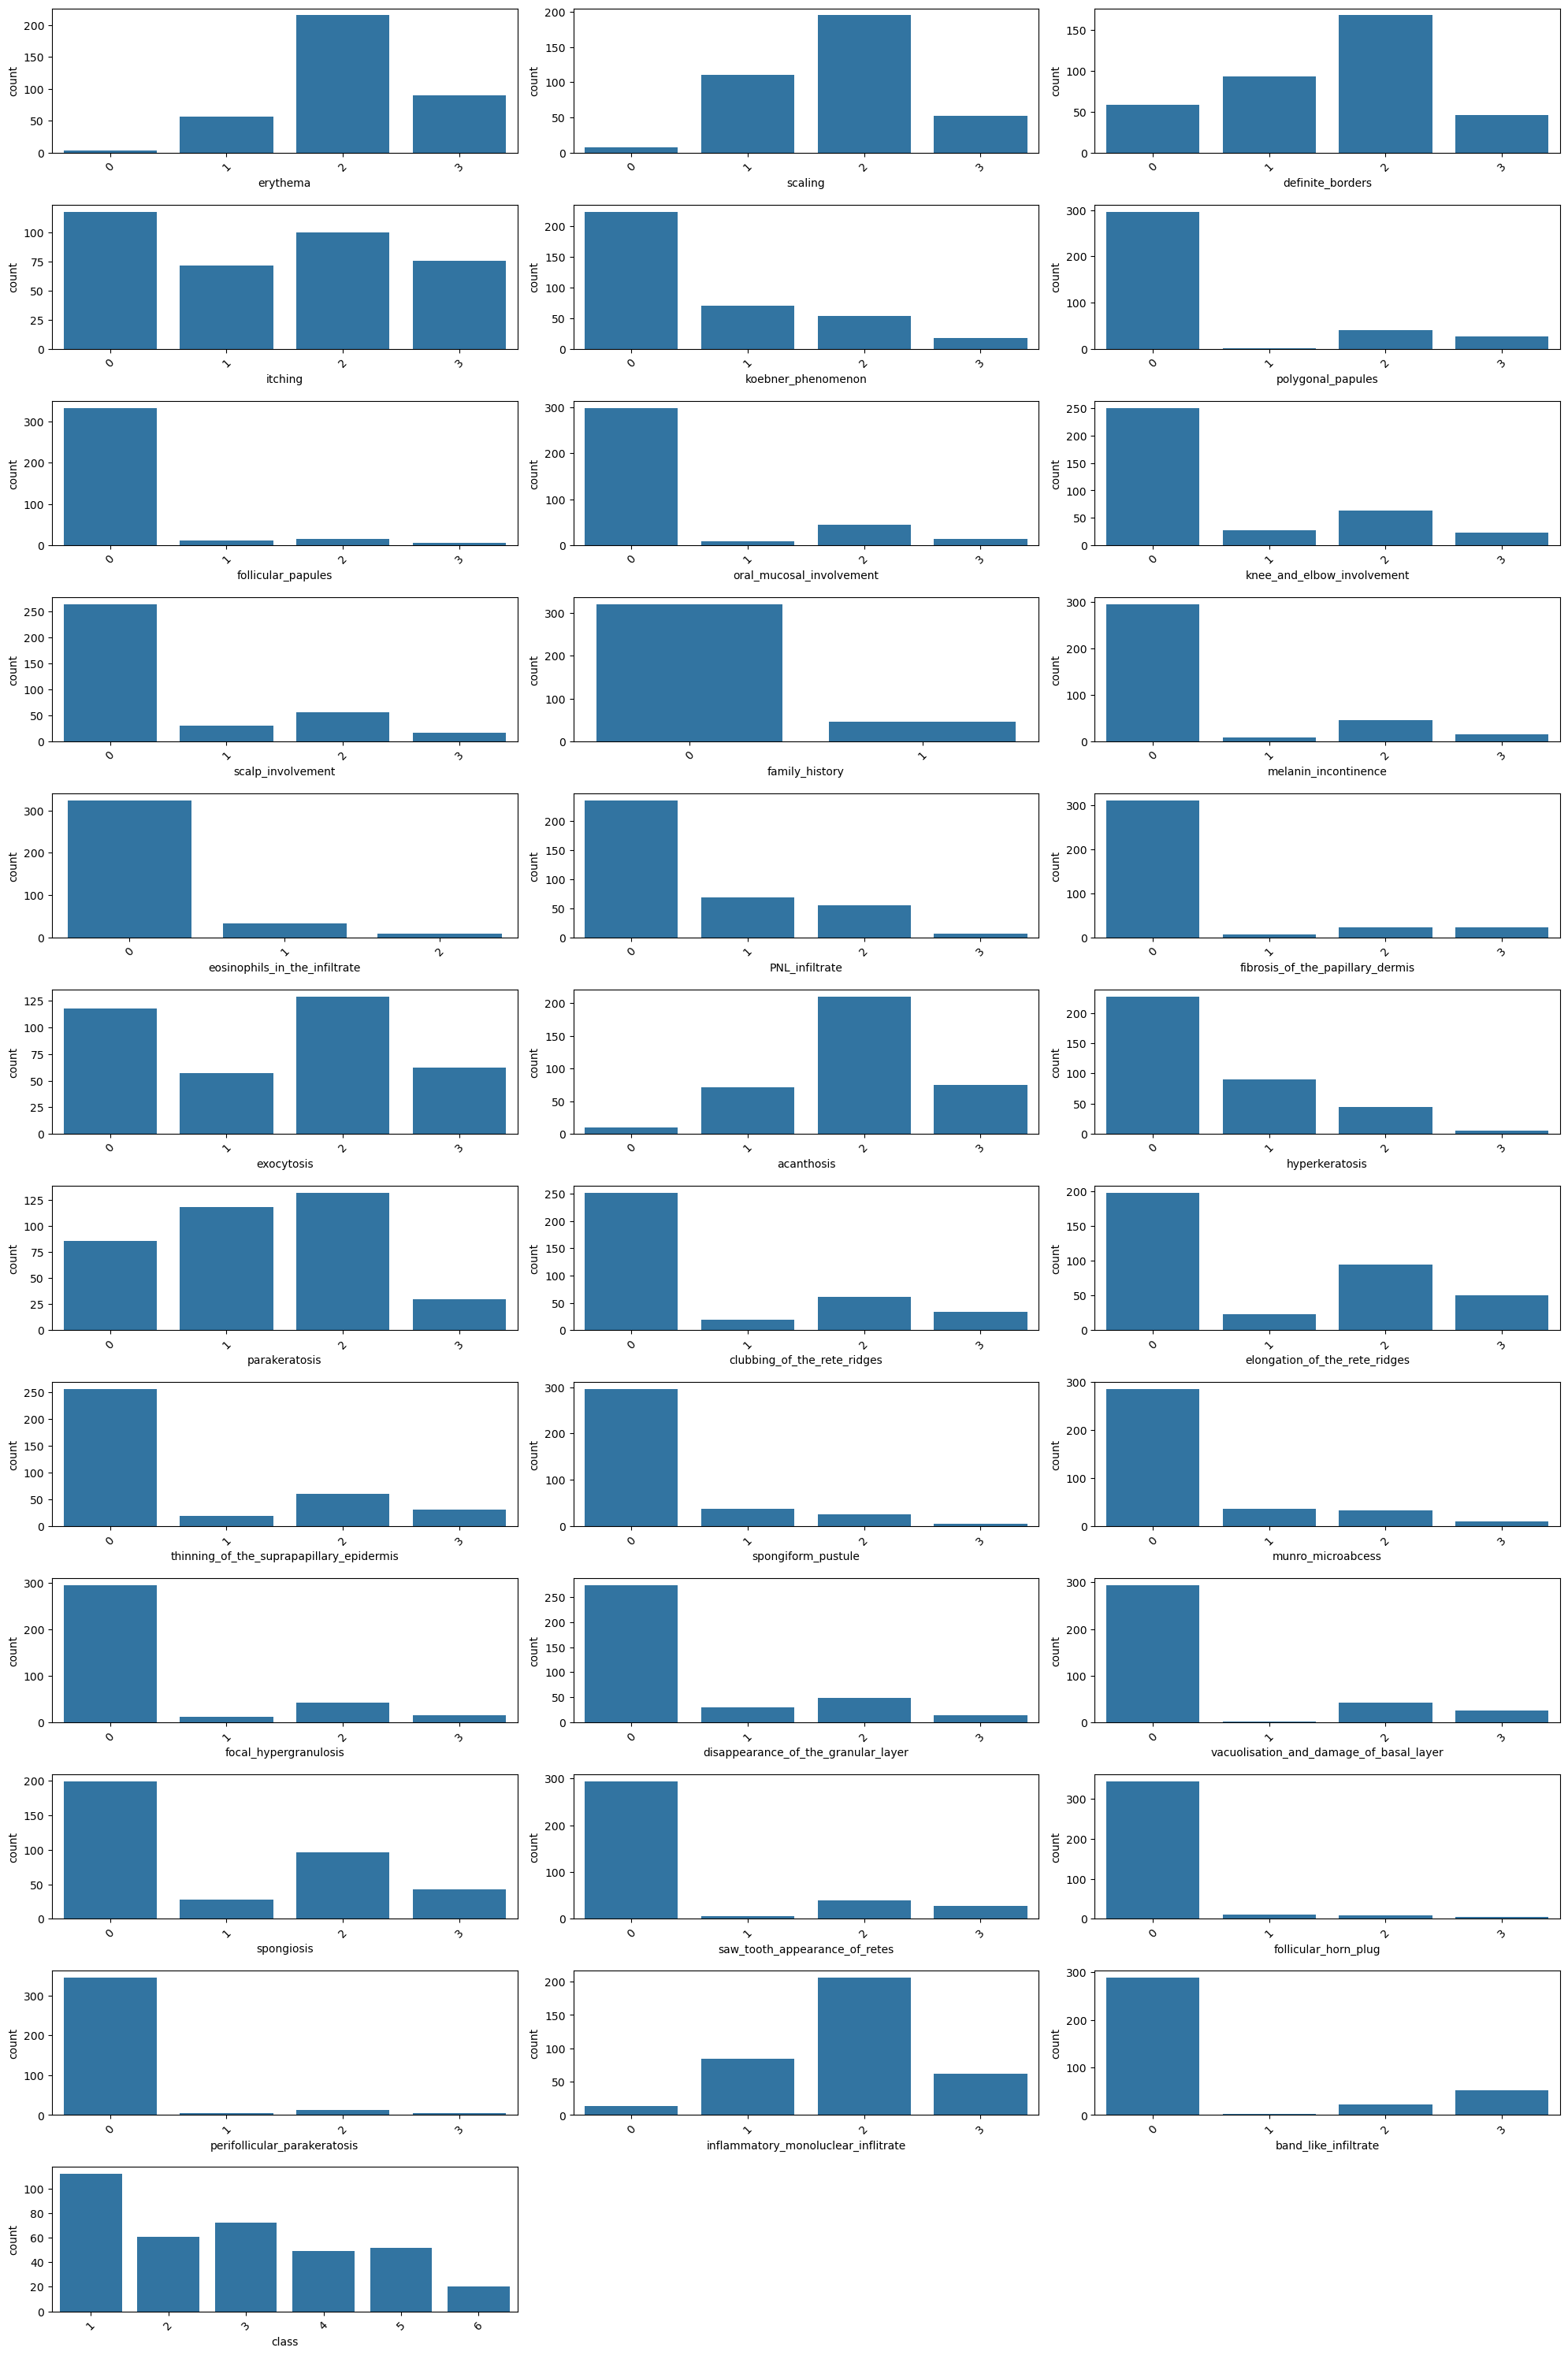

In [15]:
plt.figure(figsize=(20,30))
plotnumber = 1
for i in df:
    if len(df[i].unique()) < 20:
        plt.subplot(12,3,plotnumber)
        plt.xticks(rotation = 45)
        sns.countplot(x = df[i])
        plotnumber += 1

plt.tight_layout()

### Insights:- 

1. **Erythema**: 
   - Most patients have a moderate level of erythema (value 1). 
   - There are fewer patients with severe erythema (values 2 and 3), suggesting that erythema is a common but not extreme symptom.

2. **Scaling**: 
   - The majority of patients either don't have scaling (value 0) or have a moderate amount (value 1). 
   - Fewer people have severe scaling, similar to erythema.

3. **Definite Borders**: 
   - Most patients either don’t have definite borders (value 0) or have a mild indication (value 1).
   - Some have very clear borders, but it’s less common (values 2 and 3).

4. **Itching**: 
   - Itching is evenly spread across the population, but a significant group shows no itching (value 0). 
   - Moderate itching (value 1) is common, while severe itching is less frequent.

5. **Koebner Phenomenon**: 
   - Most patients don’t exhibit the Koebner phenomenon (value 0).
   - Only a small group has this symptom, which seems to be either mild (value 1) or moderate (value 2).

6. **Polygonal Papules**: 
   - Most patients show no polygonal papules (value 0).
   - For those who do have them, it’s usually mild (value 1) or moderate (value 2).

7. **Follicular Papules**: 
   - Like polygonal papules, most patients do not have follicular papules.
   - Those who do mostly have mild cases (value 1).

8. **Oral Mucosal Involvement**: 
   - Almost all patients show no oral mucosal involvement (value 0), indicating this is a rare feature.

9. **Knee and Elbow Involvement**: 
   - A large majority of patients don’t have knee or elbow involvement (value 0), but some do, with severity ranging from mild to moderate.

10. **Scalp Involvement**: 
    - Nearly all patients show no scalp involvement (value 0), meaning this feature is uncommon in the dataset.

11. **Family History**: 
    - Most patients don’t report a family history of the condition (value 0), but a noticeable portion does have a family history (value 1).

12. **Melanin Incontinence**: 
    - Melanin incontinence is absent in most patients (value 0), with very few showing mild (value 1) or moderate (value 2) symptoms.

13. **Eosinophils in the Infiltrate**: 
    - Most patients do not have eosinophils in the infiltrate (value 0), but for those who do, it appears in varying levels.

14. **PNL Infiltrate**: 
    - The majority of patients show no presence of PNL infiltrate (value 0), but the rest show varying degrees of involvement.

15. **Fibrosis of the Papillary Dermis**: 
    - Most patients don’t have fibrosis (value 0), and those who do, experience mild cases.

16. **Exocytosis**: 
    - A balanced distribution is seen for exocytosis, with some patients showing no signs, while others have mild to moderate symptoms.

17. **Acanthosis**: 
    - Most patients do not have acanthosis (value 0), and those that do show either mild or moderate levels.

18. **Hyperkeratosis**: 
    - A significant portion of patients show no hyperkeratosis (value 0), with some experiencing it in various degrees.

19. **Parakeratosis**: 
    - This is absent in most patients, but for those with it, the severity ranges mostly between mild and moderate.

20. **Clubbing of the Rete Ridges**: 
    - Similar to other features, the majority of patients don’t experience this (value 0), but for those who do, it’s typically mild.

21. **Elongation of the Rete Ridges**: 
    - Most patients do not show this symptom (value 0), but those that do experience it, it is usually mild to moderate.

22. **Munro Microabscess**: 
    - A rare condition, most patients do not have Munro microabscess (value 0), and those that do mostly show mild involvement.

23. **Thinning of the Suprapapillary Epidermis**: 
    - This is another feature where most patients show no signs of thinning (value 0), with a minority showing mild cases.

24. **Spongiform Pustule**: 
    - Nearly all patients show no presence of spongiform pustules (value 0), indicating this is uncommon.

25. **Local Hypergranulosis**: 
    - There’s a fairly even distribution of this symptom, with a lot of patients showing mild cases and others showing moderate or severe cases.

26. **Disappearance of the Granular Layer**: 
    - Most patients do not have this symptom, but for those who do, it is evenly spread across mild to moderate levels.

27. **Vacuolisation and Damage of Basal Layer**: 
    - The majority of patients show no signs of vacuolisation (value 0), while a small percentage show mild to moderate symptoms.

28. **Saw Tooth Appearance of Rete Ridges**: 
    - This is uncommon, as most patients don’t show this feature (value 0), and only a few show mild to moderate signs.

29. **Follicular Horn Plug**: 
    - This symptom is absent in most patients, with a few showing mild cases.

30. **Perifollicular Parakeratosis**: 
    - Most patients do not have perifollicular parakeratosis, but for those that do, the severity ranges from mild to moderate.

31. **Inflammatory Monoluclear Infiltrate**: 
    - The presence of inflammatory monoluclear infiltrate is fairly evenly distributed, with moderate levels being more common.

32. **Band-Like Infiltrate**: 
    - This is less common, with most patients not showing this feature (value 0), but a few with mild to moderate signs.

33. **Class**: 
    - The class distribution shows that the dataset has a range of skin conditions, with classes 1 and 3 being the most frequent, and class 2 being the least frequent.

<Axes: xlabel='Age', ylabel='Count'>

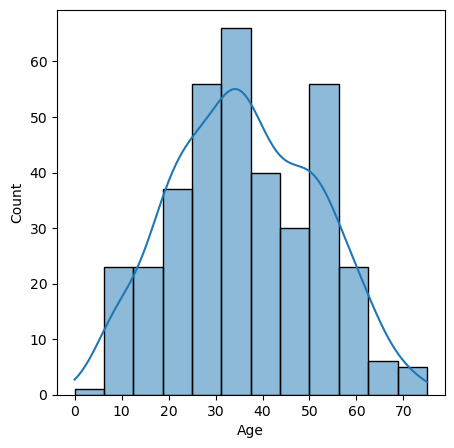

In [16]:
plt.figure(figsize=(5,5))
sns.histplot(x=df.Age,kde=True)

### Bi varient Analysis

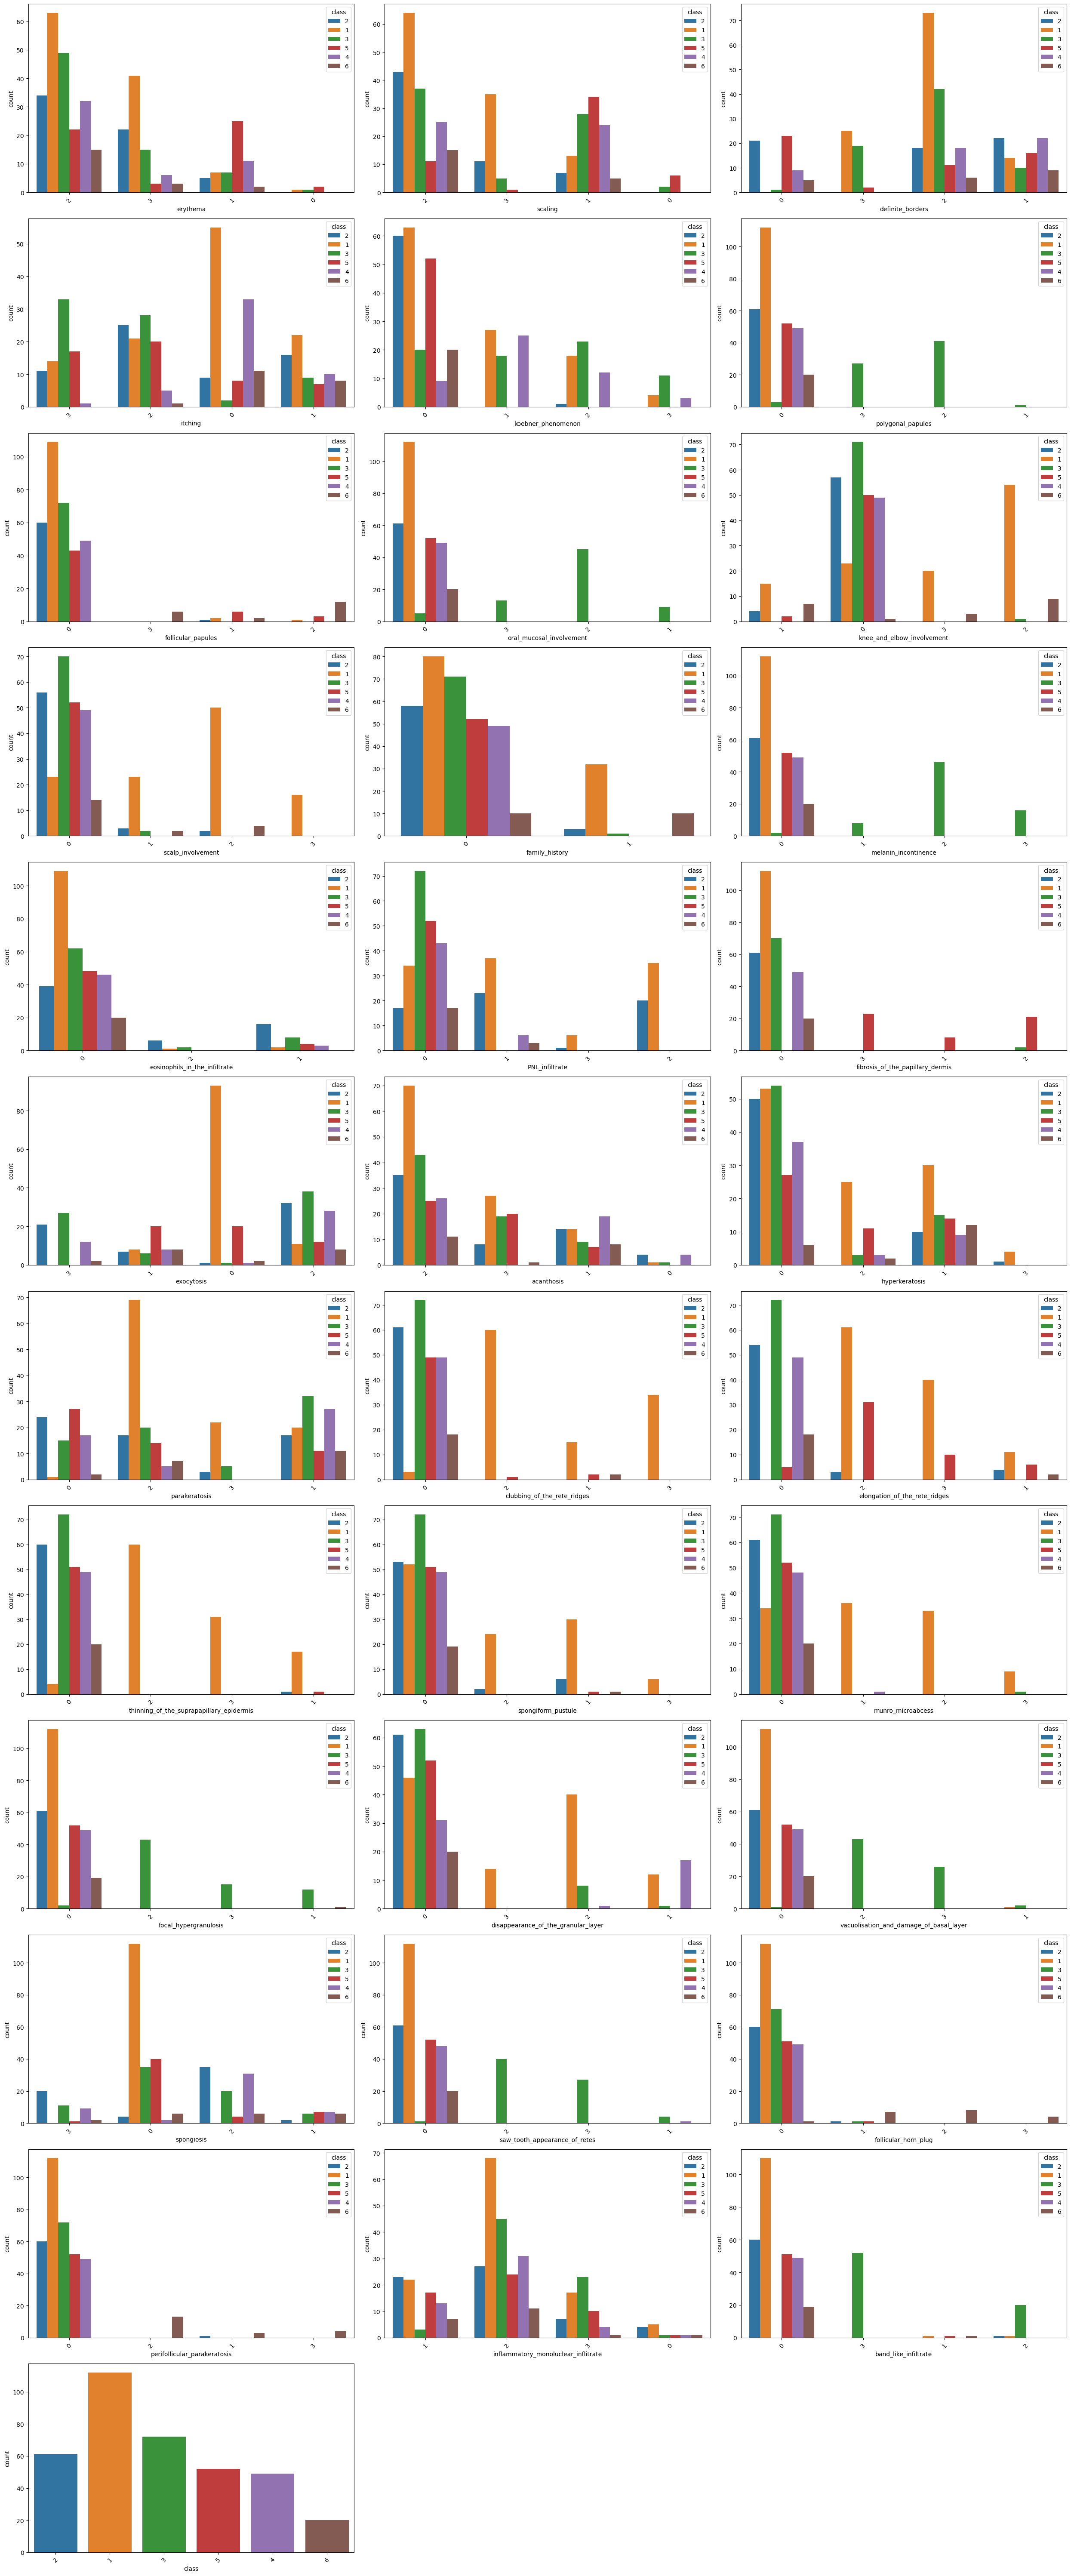

In [18]:
plt.figure(figsize=(25,60))
plotnumber = 1

for i in df:
    if len(df[i].unique()) < 20:
        plt.subplot(12, 3, plotnumber)
        plt.xticks(rotation=45)
        
        # Convert integer columns to string for plotting
        sns.countplot(x=df[i].astype(str), hue=df["class"].astype(str))
        
        plotnumber += 1

plt.tight_layout()
plt.show()


### Insights:-

1. Erythema vs Class:
   - Class 1, 3, and 4 show higher instances of erythema.
   - Class 2 and 5 have lower counts across all erythema levels, suggesting erythema may be less relevant to these conditions.

2. Scaling vs Class:
   - Class 3 and 1 dominate at all levels of scaling, with class 3 showing the highest number of patients with moderate scaling (level 1).
   - Class 4 and 2 show minimal scaling.

3. Definite Borders vs Class:
   - Class 1 and 3 show a strong presence of definite borders, especially at level 1.
   - Class 4 and 5 have fewer instances, indicating less distinct borders in those conditions.

4. Itching vs Class:
   - Itching is most prominent in class 3, followed by class 1.
   - Class 5 has relatively few instances of itching.

5. Koebner Phenomenon vs Class:
   - Koebner phenomenon is rare but more frequent in class 1 and 3.
   - Other classes show almost no association with this symptom.

6. Polygonal Papules vs Class:
   - Class 3 and 1 show more patients with polygonal papules, while class 2, 4, and 5 have minimal occurrences.

7. Follicular Papules vs Class:
   - Class 3 has the highest association with follicular papules.
   - Class 1 and 4 also show some, but class 2 and 5 have very few or none.

8. Oral Mucosal Involvement vs Class:
   - Class 3 has more cases with oral mucosal involvement.
   - Class 1 and 2 are less affected, while class 4 and 5 show very few cases.

9. Knee and Elbow Involvement vs Class:
   - Class 3 and 1 have higher levels of knee and elbow involvement.
   - Other classes show almost no involvement, suggesting this feature could help differentiate class 3 and 1 from others.

10. Scalp Involvement vs Class:
    - Scalp involvement is more frequent in class 3, with class 1 following.
    - Class 4, 2, and 5 show very low or no involvement.

11. Family History vs Class:
    - Class 3 shows a stronger family history association, followed by class 1 and 2.
    - Class 5 has almost no family history linkage.

12. Melanin Incontinence vs Class:
    - Class 3 shows more melanin incontinence than other classes.
    - This symptom is minimal or absent in classes 2, 4, and 5.

13. Eosinophils in Infiltrate vs Class:
    - Class 3 has the highest number of patients with eosinophils in the infiltrate, followed by class 1.
    - Class 2, 4, and 5 show almost none.

14. PNL Infiltrate vs Class:
    - Class 3 shows the most PNL infiltrate, followed by class 1.
    - Classes 2 and 5 have little to no presence of this feature.

15. Fibrosis of Papillary Dermis vs Class:
    - Class 1 and 3 show moderate levels of fibrosis in the papillary dermis.
    - Classes 2, 4, and 5 show almost none.

16. Exocytosis vs Class:
    - Exocytosis is higher in class 3 and 1, with class 4 showing some, and class 2 and 5 being mostly absent.

17. Acanthosis vs Class:
    - Acanthosis is more prevalent in class 3 and 1.
    - Class 5 and 2 show almost no association with this symptom.

18. Hyperkeratosis vs Class:
    - Hyperkeratosis is mainly found in class 3 and 1, with some occurrences in class 2 and 4.
    - Class 5 shows minimal presence.

19. Parakeratosis vs Class:
    - Parakeratosis is more associated with class 3, followed by class 1.
    - It’s nearly absent in class 5 and 2.

20. Clubbing of Rete Ridges vs Class:
    - Clubbing of rete ridges is most common in class 3 and 1, and absent in class 2, 4, and 5.

21. Elongation of Rete Ridges vs Class:
    - Class 3 and 1 show more elongation, while class 4 and 5 are almost unaffected.

22. Munro Microabscess vs Class:
    - Munro microabscess is strongly linked to class 1 and 3, with the other classes showing very few or no cases.

23. Thinning of Suprapapillary Epidermis vs Class:
    - Class 1 shows the highest thinning of the suprapapillary epidermis, followed by class 3.
    - Classes 2, 4, and 5 show almost no association with this symptom.

24. Spongiform Pustule vs Class:
    - Class 3 and 1 show more occurrences of spongiform pustules, with very few cases in other classes.

25. Local Hypergranulosis vs Class:
    - Class 3 shows the highest number of patients with local hypergranulosis, followed by class 1.
    - Other classes show fewer cases.

26. Disappearance of Granular Layer vs Class:
    - This symptom is most frequent in class 3, followed by class 1, while other classes show almost no cases.

27. Vacuolisation and Damage of Basal Layer vs Class:
    - Vacuolisation and damage are more common in class 3, with minimal instances in the other classes.

28. Saw Tooth Appearance of Rete Ridges vs Class:
    - Class 3 shows a strong correlation with the saw-tooth appearance of rete ridges, followed by class 1. Other classes show very few cases.

29. Follicular Horn Plug vs Class:
    - This feature is seen mostly in class 3 and 1, with very few or no cases in other classes.

30. Perifollicular Parakeratosis vs Class:
    - Class 3 has more cases with perifollicular parakeratosis, while class 1 shows fewer cases. Class 4 and 5 show almost no cases.

31. Inflammatory Mononuclear Infiltrate vs Class:
    - Class 3 and 1 show higher levels of inflammatory mononuclear infiltrate, with other classes showing less or no involvement.

32. Band-Like Infiltrate vs Class:
    - Class 3 and 1 show some band-like infiltrate, but it’s almost absent in other classes.
    

## 5.Data Preprocessing

### Handling with null values

In [21]:
df.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

### Handling with categorical data - as every attribute is numerical there is no need for this step 

### Handling with outliers - as every data is limited from 0-3 there is no need to check for outliers as we have checked in basic checks there is no numbers other than 0,1,2,3 except the output class has 1 to 6

### Feature selection

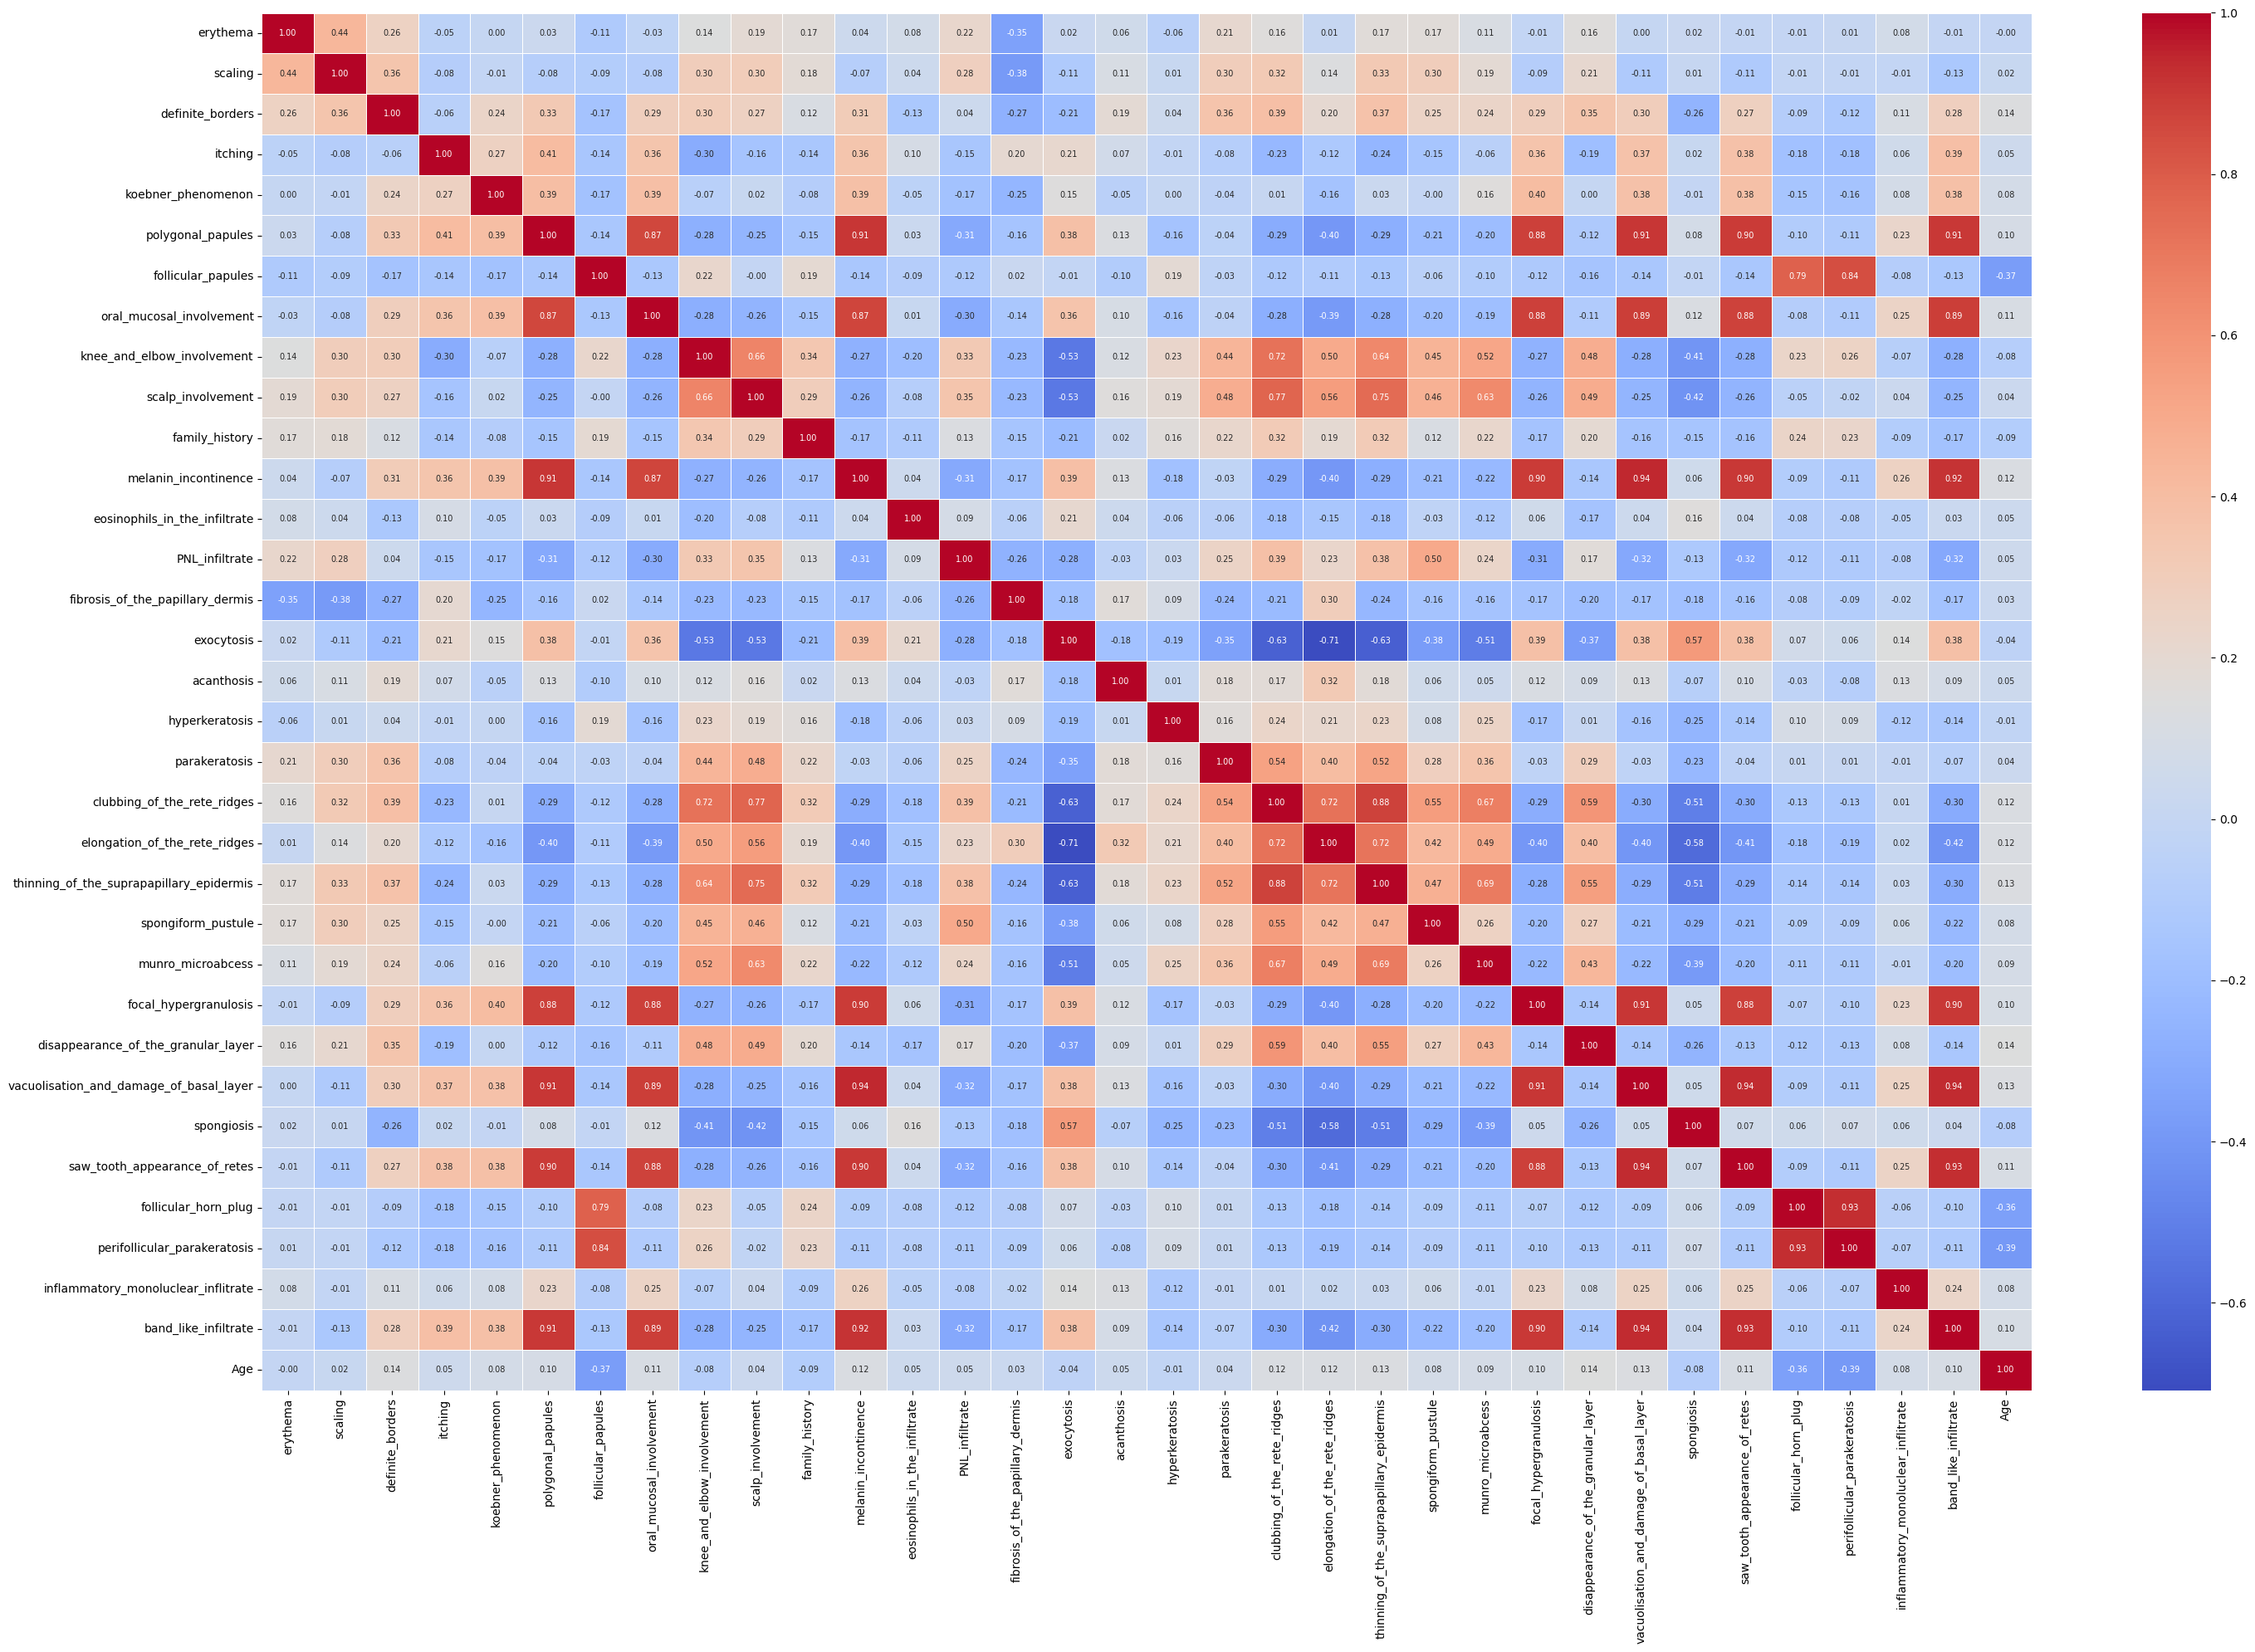

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase figure size to give more room for the heatmap
plt.figure(figsize=(30, 20))  

# Use the heatmap with smaller annotations and a reduced linewidth
sns.heatmap(df.drop('class', axis=1).corr(), annot=True, fmt=".2f", cmap='coolwarm', 
            annot_kws={"size": 7}, linewidths=0.5)  # Adjusted annotation font size and added linewidths for clarity

# Adjust the layout for better display
plt.tight_layout()

plt.show()

In [26]:
df.drop('class',axis=1).corr()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw_tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band_like_infiltrate,Age
erythema,1.000000,0.435467,0.260087,-0.047623,0.000694,0.033571,-0.109550,-0.026810,0.141008,0.186684,0.172059,0.042126,0.075228,0.224095,-0.354595,0.021565,0.064165,-0.055432,0.210030,0.157558,0.007819,0.167868,0.169773,0.113464,-0.013761,0.159100,0.002559,0.022468,-0.005779,-0.005450,0.009539,0.075758,-0.006955,-0.003724
scaling,0.435467,1.000000,0.357987,-0.084197,-0.010576,-0.075035,-0.092400,-0.082969,0.298398,0.301577,0.181491,-0.074856,0.042211,0.282486,-0.383585,-0.110809,0.108095,0.013149,0.296752,0.320740,0.139073,0.330343,0.297783,0.186366,-0.085021,0.211484,-0.109523,0.012151,-0.114467,-0.010518,-0.011135,-0.010977,-0.132079,0.017285
definite_borders,0.260087,0.357987,1.000000,-0.062564,0.241342,0.327754,-0.166662,0.286684,0.302309,0.268862,0.115844,0.311398,-0.132021,0.041330,-0.274414,-0.205391,0.189761,0.043894,0.361213,0.387205,0.201702,0.369266,0.246204,0.242232,0.291147,0.354768,0.298095,-0.255536,0.274576,-0.086250,-0.123947,0.111882,0.282578,0.137866
itching,-0.047623,-0.084197,-0.062564,1.000000,0.267878,0.409696,-0.144825,0.359163,-0.299645,-0.155639,-0.136615,0.359207,0.095434,-0.145288,0.203032,0.214822,0.067080,-0.008460,-0.075568,-0.232224,-0.124058,-0.244052,-0.152689,-0.056056,0.363488,-0.192684,0.367650,0.017514,0.376186,-0.175866,-0.184074,0.062781,0.386691,0.046546
koebner_phenomenon,0.000694,-0.010576,0.241342,0.267878,1.000000,0.394108,-0.172741,0.392554,-0.066372,0.015202,-0.083247,0.385687,-0.046366,-0.169377,-0.247451,0.145960,-0.054449,0.002635,-0.036801,0.008471,-0.163819,0.026064,-0.002065,0.157646,0.400409,0.004327,0.376473,-0.005938,0.381687,-0.147955,-0.164364,0.083358,0.382844,0.080599
polygonal_papules,0.033571,-0.075035,0.327754,0.409696,0.394108,1.000000,-0.137093,0.865142,-0.276058,-0.253234,-0.151841,0.907044,0.028824,-0.314515,-0.158046,0.379643,0.129210,-0.164355,-0.042098,-0.294857,-0.400544,-0.287468,-0.206530,-0.201893,0.880972,-0.119698,0.911626,0.080063,0.895107,-0.095477,-0.110204,0.228426,0.905822,0.095935
follicular_papules,-0.109550,-0.092400,-0.166662,-0.144825,-0.172741,-0.137093,1.000000,-0.132394,0.222255,-0.003535,0.192866,-0.136165,-0.087452,-0.119728,0.019698,-0.010869,-0.096592,0.189201,-0.029654,-0.115856,-0.105356,-0.128361,-0.057283,-0.095856,-0.118710,-0.157296,-0.139960,-0.013454,-0.139141,0.785282,0.844929,-0.084864,-0.133871,-0.370436
oral_mucosal_involvement,-0.026810,-0.082969,0.286684,0.359163,0.392554,0.865142,-0.132394,1.000000,-0.283466,-0.259813,-0.151825,0.869231,0.014122,-0.303735,-0.140047,0.360138,0.101565,-0.155177,-0.039258,-0.284750,-0.386815,-0.277615,-0.199452,-0.190861,0.884351,-0.106704,0.887552,0.120344,0.875209,-0.082601,-0.106426,0.250937,0.892341,0.110527
knee_and_elbow_involvement,0.141008,0.298398,0.302309,-0.299645,-0.066372,-0.276058,0.222255,-0.283466,1.000000,0.659206,0.341915,-0.272314,-0.198670,0.331709,-0.227428,-0.529946,0.116711,0.229538,0.439951,0.721602,0.496067,0.644669,0.447252,0.518155,-0.267508,0.481743,-0.282151,-0.413200,-0.280395,0.232903,0.257661,-0.068621,-0.276711,-0.077278
scalp_involvement,0.186684,0.301577,0.268862,-0.155639,0.015202,-0.253234,-0.003535,-0.259813,0.659206,1.000000,0.292728,-0.256779,-0.076957,0.353083,-0.226418,-0.531623,0.158394,0.187032,0.481270,0.769594,0.555905,0.747036,0.464370,0

### During our analysis, we observed that several attributes have a correlation greater than 90%. To enhance the model's performance and reduce multicollinearity, we will consider removing some of these highly correlated attributes. Below are the pairs of attributes that exhibit strong correlations:

1. polygonal_papules - melanin_incontinence: 91
2. polygonal_papules - vacuolisation_and_damage_of_basal_layer: 94
3. Focal_hypergranulosis - vacuolisation_and_damage_of_basal_layer: 91
4. melanin_incontinence - vacuolisation_and_damage_of_basal_layer: 94
5. saw_tooth_appearance_of_retes - vacuolisation_and_damage_of_basal_layer: 94
6. vacuolisation_and_damage_of_basal_layer - band_like_infiltrate: 94
7. band_like_infiltrate - saw_tooth_appearance_of_retes: 93
8. perifollicular_parakeratosis - follicular_horn_plug: 93
9. polygonal_papules - band_like_infiltrate: 91
10. band_like_infiltrate - melanin_incontinence: 92

By addressing these correlations, we aim to streamline our feature set and improve the predictive accuracy of our models.

In [27]:

columns_to_remove = [
    'melanin_incontinence',  # from 1) and 4) (chosen arbitrarily)
    'vacuolisation_and_damage_of_basal_layer',  # from 2), 3), 4), 5), 6)
    'saw_tooth_appearance_of_retes',  # from 5) and 7)
    'follicular_horn_plug',  # from 8)
    'band_like_infiltrate'  # from 6), 7), 9), 10)
]

# Dropping the highly correlated columns
df_cleaned = df.drop(columns=columns_to_remove)



In [28]:
df_cleaned.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,spongiosis,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,3,0,1,55.0,2
1,3,3,3,2,1,0,0,0,1,1,1,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,1,8.0,1
2,2,1,2,3,1,3,0,3,0,0,0,0,0,0,1,2,0,2,0,0,0,0,0,2,0,3,0,2,26.0,3
3,2,2,2,0,0,0,0,0,3,2,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,3,40.0,1
4,2,3,2,2,2,2,0,2,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,2,2,2,0,2,45.0,3


## 6.Model Creation

In [30]:
x = df_cleaned.drop('class',axis=1)
x.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,spongiosis,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,Age
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,3,0,1,55.0
1,3,3,3,2,1,0,0,0,1,1,1,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,1,8.0
2,2,1,2,3,1,3,0,3,0,0,0,0,0,0,1,2,0,2,0,0,0,0,0,2,0,3,0,2,26.0
3,2,2,2,0,0,0,0,0,3,2,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,3,40.0
4,2,3,2,2,2,2,0,2,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,2,2,2,0,2,45.0


In [31]:
y=df_cleaned['class']
y

0      2
1      1
2      3
3      1
4      3
      ..
361    4
362    4
363    3
364    3
365    1
Name: class, Length: 366, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(292, 29)
(74, 29)
(292,)
(74,)


In [34]:
from sklearn.preprocessing import StandardScaler


# Scaling the 'Age' column
scaler = StandardScaler()
x_train['Age'] = scaler.fit_transform(x_train[['Age']])
x_test['Age'] = scaler.transform(x_test[['Age']])



In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier


# Function to evaluate models
def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting on the training set
    y_train_pred = model.predict(x_train)
    # Predicting on the test set
    y_test_pred = model.predict(x_test)
    
    # Calculating metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='macro')  # Macro for multi-class F1
    
    # Printing results
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 30)

# List of models to try
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', max_iter=500),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=500),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB()
}

# Looping through models and evaluating each one
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    evaluate_model(model, x_train, y_train, x_test, y_test)


Evaluating Logistic Regression...
Training Accuracy: 0.9966
Testing Accuracy: 0.9595
F1 Score: 0.9479
------------------------------
Evaluating SVM...
Training Accuracy: 0.9897
Testing Accuracy: 0.9865
F1 Score: 0.9801
------------------------------
Evaluating k-NN...
Training Accuracy: 0.9726
Testing Accuracy: 0.9595
F1 Score: 0.9531
------------------------------
Evaluating Neural Network...
Training Accuracy: 1.0000
Testing Accuracy: 0.9865
F1 Score: 0.9801
------------------------------
Evaluating Gradient Boosting...
Training Accuracy: 1.0000
Testing Accuracy: 0.9730
F1 Score: 0.9676
------------------------------
Evaluating Naive Bayes...
Training Accuracy: 0.8733
Testing Accuracy: 0.9189
F1 Score: 0.8682
------------------------------


### As there are some of the attributes which has =90 in correlation between them , i want to remove them and want to compare with the above accuracies of modifed models which is done by removing the >90 correlation 


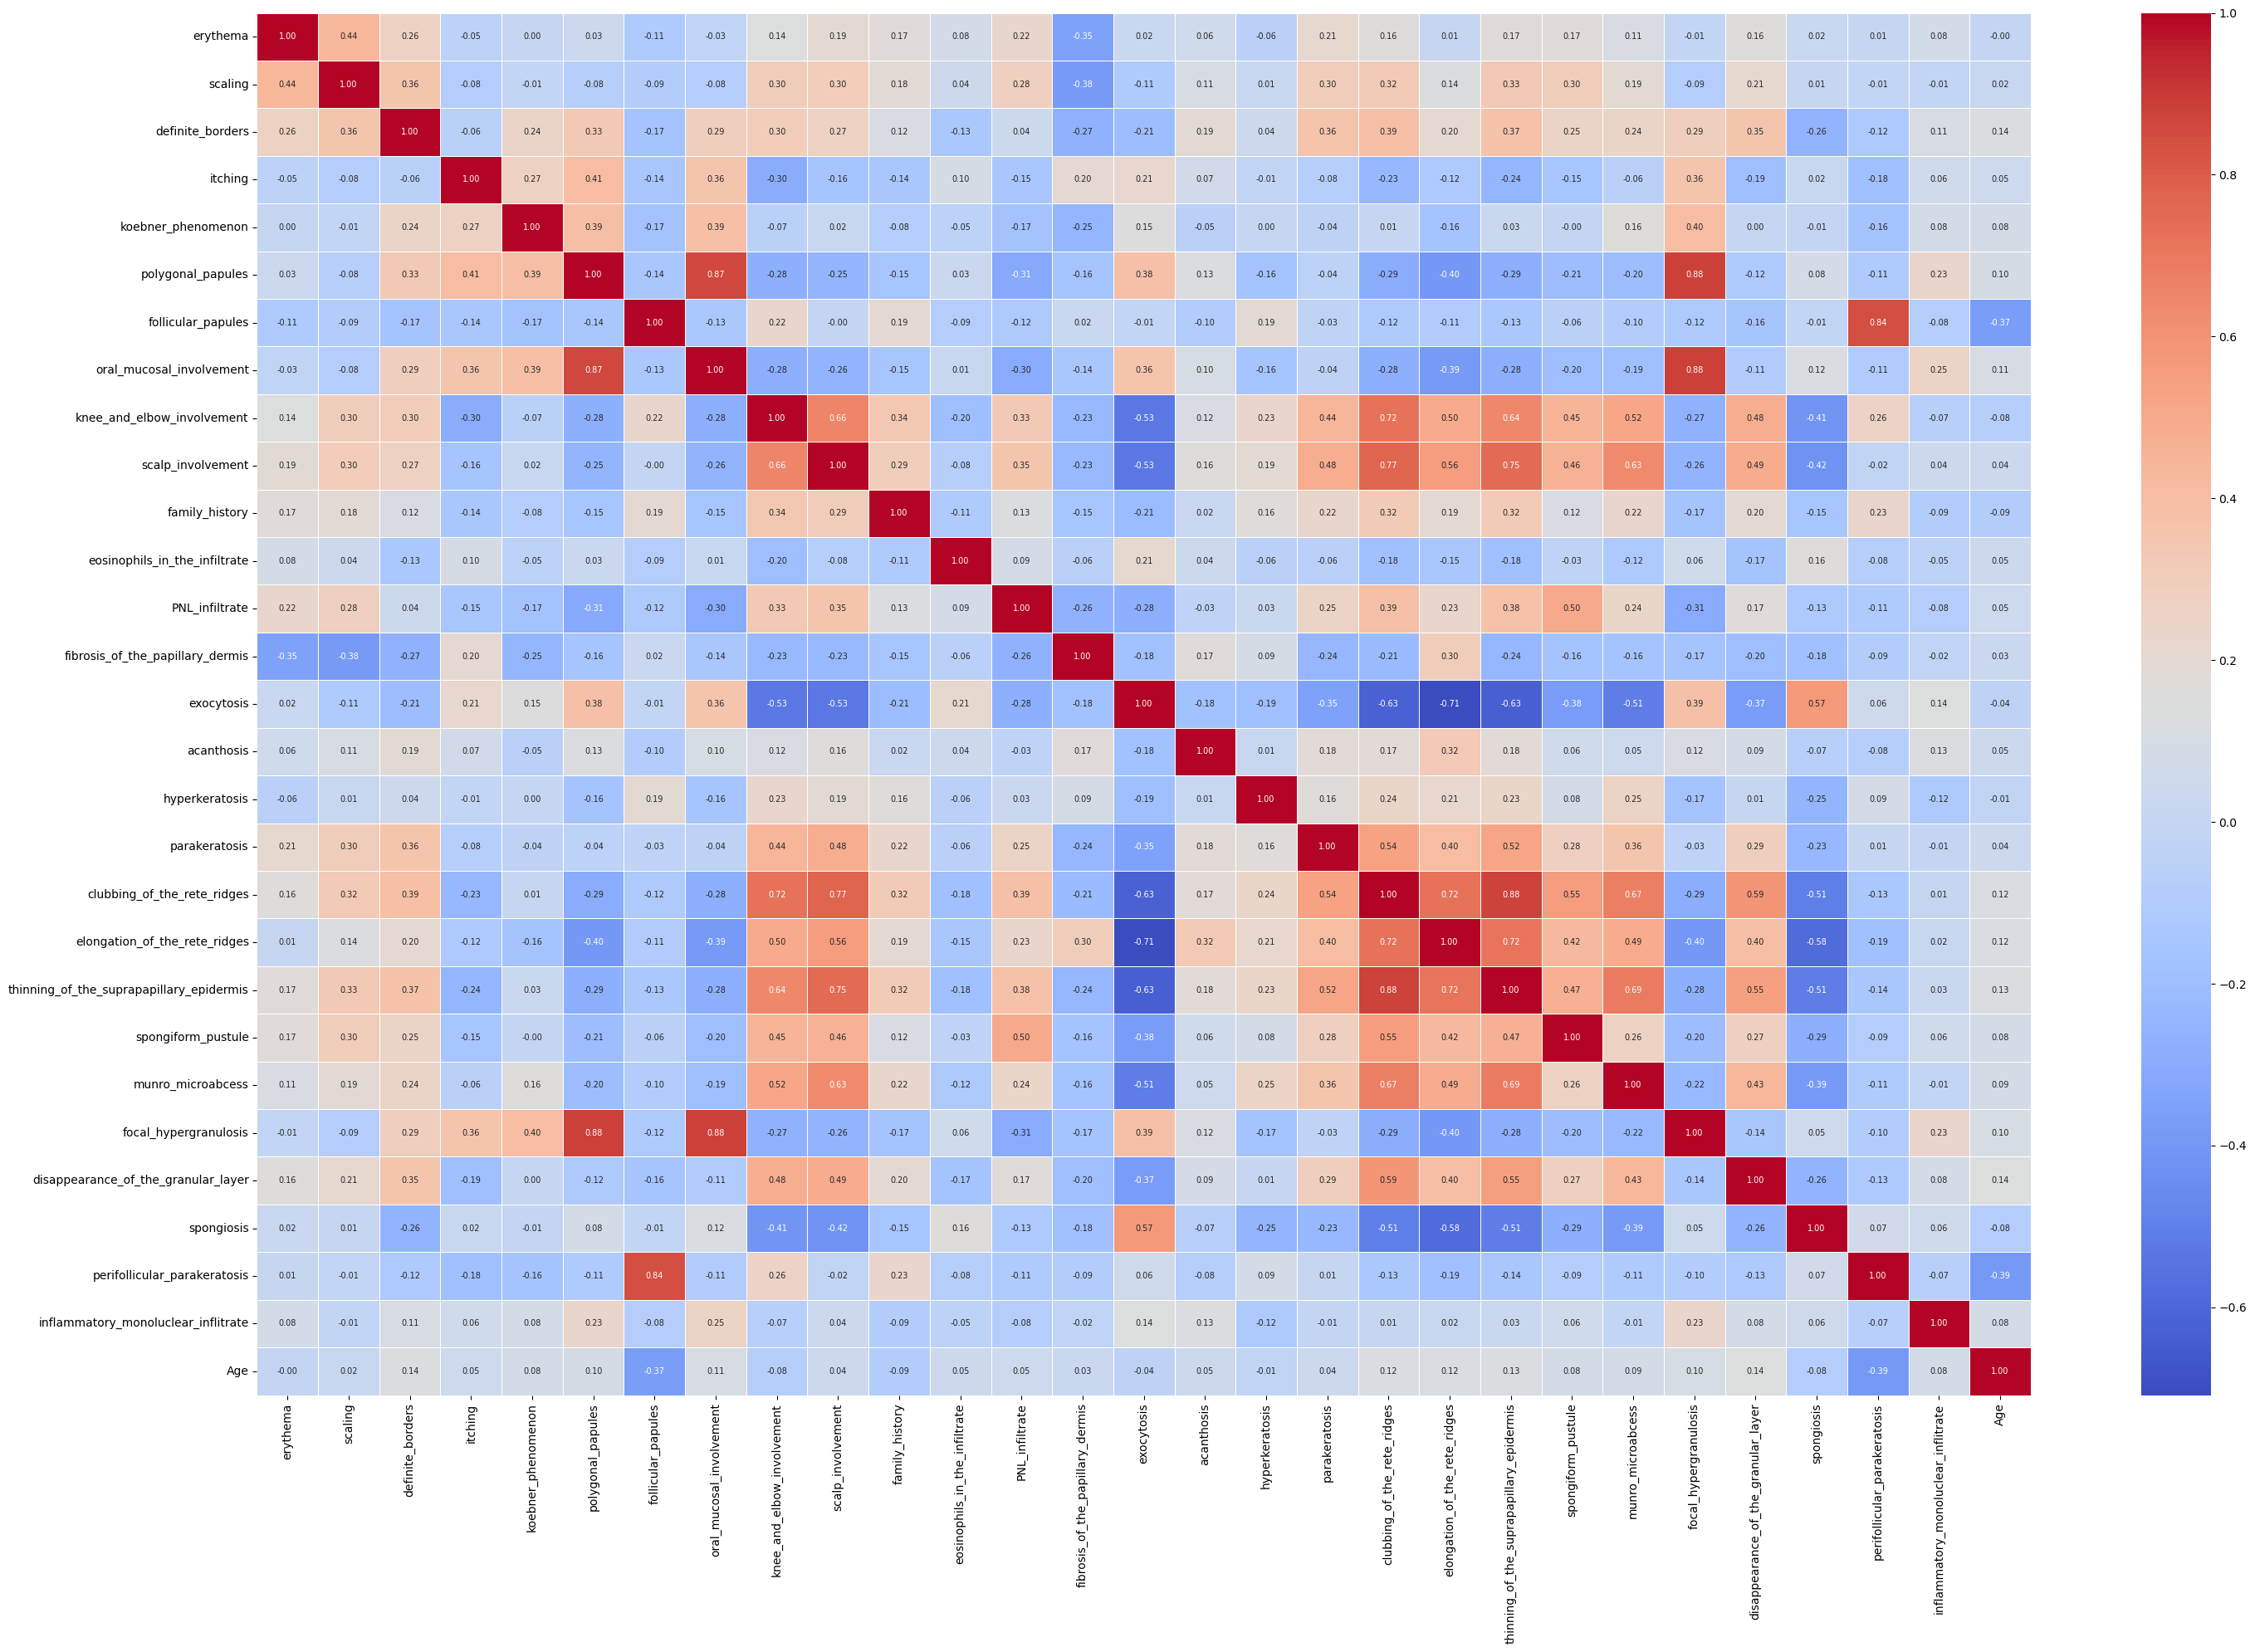

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase figure size to give more room for the heatmap
plt.figure(figsize=(30, 20))  

# Use the heatmap with smaller annotations and a reduced linewidth
sns.heatmap(df_cleaned.drop('class', axis=1).corr(), annot=True, fmt=".2f", cmap='coolwarm', 
            annot_kws={"size": 7}, linewidths=0.5)  # Adjusted annotation font size and added linewidths for clarity

# Adjust the layout for better display
plt.tight_layout()

plt.show()


### 7. Methodology

### 8.Observations

### 9.Conclusion

## 10.Suggestions for Early Identification of Skin Diseases for Doctors:

                                                     
1.Use AI-Assisted Tools: Leverage AI models to assist in early screening and provide a second opinion for accurate diagnosis.  
                                                                                                     
2.Focus on Symptom Clusters: Pay attention to common symptoms like redness and scaling. Use histopathology for more accurate differentiation.  

3.Track Early Warning Signs: Monitor chronic conditions early and consider family history to identify at-risk patients.  

4.Prioritize High-Risk Patients: Screen patients with autoimmune disorders or environmental exposure more frequently.  

5.Utilize Mobile Health and Telemedicine: Encourage the use of apps and telemedicine for continuous monitoring and remote diagnosis.  

6.Stay Updated: Improve awareness of rare conditions and pursue ongoing medical education to enhance diagnostic skills.  

7.Early Testing: Use tools like dermatoscopy and perform early biopsies for persistent lesions.  

8.Adopt Multidisciplinary Approaches: Collaborate with dermatopathologists and coordinate with primary care for timely referrals.  

9.Personalized Treatment Plans: Tailor treatments based on early diagnoses and schedule regular follow-ups for chronic conditions.  

10.Refine Diagnostic Process: Regularly review AI model insights to continuously improve diagnostic accuracy.






